# Sprint 10 - Proyecto

## Descripción del proyecto

**Contexto**

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Descripción de los datos

**Datos utilizados en la primera parte del proyecto**

/datasets/hypotheses_us.csv

* Hypotheses: breves descripciones de las hipótesis.
* Reach: alcance del usuario, en una escala del uno a diez.
* Impact: impacto en los usuarios, en una escala del uno al diez.
* Confidence: confianza en la hipótesis, en una escala del uno al diez.
* Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

**Datos utilizados en la segunda parte del proyecto**

/datasets/orders_us.csv

* transactionId: identificador de pedido.
* visitorId: identificador del usuario que realizó el pedido.
* date: fecha del pedido.
* revenue: ingresos del pedido.
* group: el grupo del test A/B al que pertenece el usuario.

/datasets/visits_us.csv

*date: la fecha.
* group: grupo de la prueba A/B.
* visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

## Inicialización

In [25]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import stats
import seaborn as sns

## Cargar datos

In [26]:
# Cargar los archivos
df_hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=';') 
df_orders = pd.read_csv("/datasets/orders_us.csv")
df_visits = pd.read_csv("/datasets/visits_us.csv")

## Información General

In [27]:
# Información general/resumida sobre el DataFrame:
df_hypotheses.info()
df_orders.info()
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (tota

In [28]:
# Muestra de los datos 
print("Información  del Dtaframe: df_hypotheses")
df_hypotheses.head()

Información  del Dtaframe: df_hypotheses


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [29]:
# Muestra de los datos 
print("Información  del Dtaframe: df_orders")
df_orders.head()

Información  del Dtaframe: df_orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [30]:
# Muestra de los datos 
print("Información  del Dtaframe: df_visits")
df_visits.head()

Información  del Dtaframe: df_visits


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [31]:
# Valores ausentes
print("Número de valores ausentes: df_hypotheses ", df_hypotheses.isna().sum())

Número de valores ausentes: df_hypotheses  Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


In [32]:
print("Número de valores ausentes: df_orders ", df_orders.isna().sum())

Número de valores ausentes: df_orders  transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [33]:
# Valores ausentes
print("Número de valores ausentes: df_visits ", df_visits.isna().sum())

Número de valores ausentes: df_visits  date      0
group     0
visits    0
dtype: int64


In [34]:
# Valores duplicados
print("Número de valores duplicados: df_hypotheses", df_hypotheses.duplicated().sum())
print("Número de valores duplicados: df_orders", df_orders.duplicated().sum())
print("Número de valores duplicados: df_visits", df_visits.duplicated().sum())

Número de valores duplicados: df_hypotheses 0
Número de valores duplicados: df_orders 0
Número de valores duplicados: df_visits 0


In [35]:
# Obtener los identificadores únicos de visitantes por grupo
usuarios_grupo_A = set(df_orders[df_orders['group'] == 'A']['visitorId'])
usuarios_grupo_B = set(df_orders[df_orders['group'] == 'B']['visitorId'])

# Identificar usuarios en ambos grupos
usuarios_duplicados = usuarios_grupo_A & usuarios_grupo_B
print(f"Usuarios en ambos grupos: {len(usuarios_duplicados)}")

# Eliminar usuarios duplicados del dataset
df_orders_filtrado = df_orders[~df_orders['visitorId'].isin(usuarios_duplicados)]

# Verifica el resultado
print(f"Tamaño original del dataset: {df_orders.shape[0]}")
print(f"Tamaño del dataset después de eliminar duplicados: {df_orders_filtrado.shape[0]}")

Usuarios en ambos grupos: 58
Tamaño original del dataset: 1197
Tamaño del dataset después de eliminar duplicados: 1016


<div class="alert alert-block alert-info">
De acuerdo con la informacion obtenida estos DF se observa que:
    
* Tienen columnas de tipo float, object y entero.
* No tiene valores ausentes.
* No tiene valores duplicados
* Sin embargo nos damos cuenta que 58 uduarios estaban duplicados en el grupo A y B. Por lo tanto, eliminamos estos duplicados.
</div>

## Priorizar hipótesis

### ICE 

In [36]:
# Cálculo de ICE y ordenamiento
df_hypotheses['ICE'] = (
    df_hypotheses['Impact'] * df_hypotheses['Confidence']
) / df_hypotheses['Effort']
print(df_hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### RICE

In [37]:
# Cálculo de RICE y ordenamiento
df_hypotheses['RICE'] = (
    df_hypotheses['Reach'] * df_hypotheses['Impact'] * df_hypotheses['Confidence']
) / df_hypotheses['Effort']
print(df_hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Comparar ICE y RICE

In [38]:
df_hypotheses[['Hypothesis', 'ICE', 'RICE']].sort_values(by=['RICE'], ascending=False)

,Hypothesis,ICE,RICE
7,Add a subscription form to all the main pages....,11.200000,112.0
2,Add product recommendation blocks to the store...,7.000000,56.0
0,Add two new channels for attracting traffic. T...,13.333333,40.0
6,Show banners with current offers and sales on ...,8.000000,40.0
8,Launch a promotion that gives users discounts ...,16.200000,16.2
3,Change the category structure. This will incre...,1.125000,9.0
1,Launch your own delivery service. This will sh...,2.000000,4.0
5,Add a customer review page. This will increase...,1.333333,4.0
4,Change the background color on the main page. ...,1.000000,3.0


<div class="alert alert-block alert-info">
Observaciones de la comparación ICE - RICE:
    
* Formulario de suscripción (#7): Esto indica que su alto alcance (Reach) jugó un papel crucial en la priorización según RICE.
* La recomendación de productos (#2): Esto sugiere que aunque su impacto y confianza no eran tan altos comparados con otras hipótesis, su alcance le da mucho peso en la priorización.
* Las hipótesis con alto impacto pero bajo alcance bajaron en el ranking con RICE
* Cambiar el fondo (#4) o agregar una página de reseñas (#5) tienen bajo ICE y RICE, lo que indica que son de baja prioridad.
</div>

## Parte 2. Análisis del test A/B

In [39]:
#  fusiona las dos tablas en una y da a sus columnas nombres descriptivos
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visits['date'] = pd.to_datetime(df_visits['date'])
df_combined = pd.merge(df_orders, df_visits, on=['date', 'group'], how='left')
print(df_combined.head(5))

   transactionId   visitorId       date  revenue group  visits
0     3667963787  3312258926 2019-08-15     30.4     B     544
1     2804400009  3642806036 2019-08-15     15.2     B     544
2     2961555356  4069496402 2019-08-15     10.2     A     628
3     3797467345  1196621759 2019-08-15    155.1     B     544
4     2282983706  2322279887 2019-08-15     40.5     B     544


### Ingreso acumulado por grupo

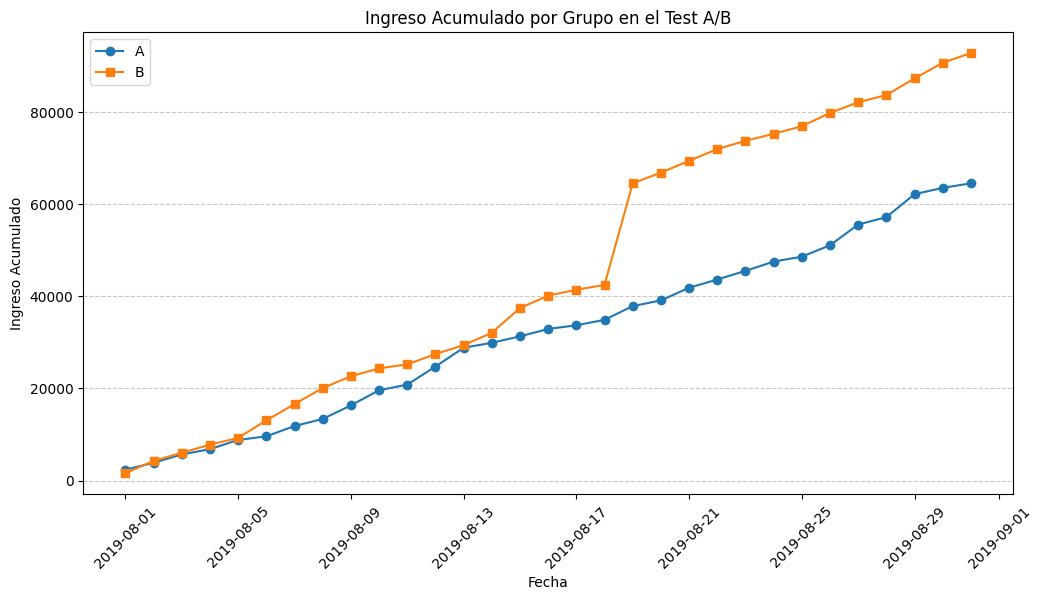

In [40]:
# Asegurarse de que la columna 'Fecha' es de tipo datetime
df_combined['date'] = pd.to_datetime(df_combined['date'])

# Ordenar los datos por fecha
df_combined = df_combined.sort_values(by='date')

# DataFrame con pedidos acumulados e ingresos acumulados por día
cumulativeRevenueA = df_combined[df_combined['group'] == 'A'][['date', 'revenue']].groupby('date').sum().cumsum()
cumulativeRevenueB = df_combined[df_combined['group'] == 'B'][['date', 'revenue']].groupby('date').sum().cumsum()

# Trazar el gráfico de ingresos acumulados
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA.index, cumulativeRevenueA['revenue'], label='A', linestyle='-', marker='o')
plt.plot(cumulativeRevenueB.index, cumulativeRevenueB['revenue'], label='B', linestyle='-', marker='s')

# Personalizar el gráfico
plt.title('Ingreso Acumulado por Grupo en el Test A/B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Durante toda la prueba los ingresos aumentaron constantemente.
El grupo B a partir del 17 de Agosto tomo ventaja sobre el grupo A.

### Promedio acumulado por grupo

Text(0, 0.5, 'Diferencia relativa')

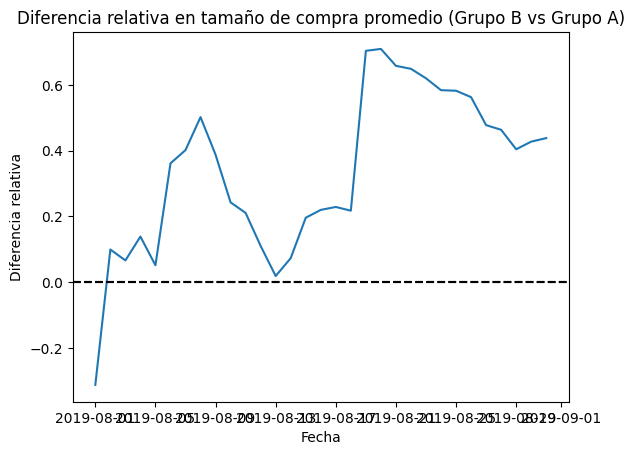

In [41]:
# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeRevenue.reset_index(inplace=True)

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'])/(mergedCumulativeRevenue['revenueA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

# Agregar línea de referencia en 0
plt.axhline(y=0, color='black', linestyle='--')

# Personalizar el gráfico
plt.title("Diferencia relativa en tamaño de compra promedio (Grupo B vs Grupo A)")
plt.xlabel("Fecha")
plt.ylabel("Diferencia relativa")

<div class="alert alert-block alert-info">
<b>Respuesta.</b> <a class="tocSkip"></a>
La diferencia entre los segmentos aumenta. ¡Esto significa que debe haber algunos pedidos grandes y valores atípicos!
</div>

### Diferencia relativa en el tamaño de pedido promedio

In [43]:
# promedio x día 
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders = df_orders.sort_values('date')


daily_avg = (
    df_orders
      .groupby(['group', 'date'])['revenue']
      .mean()                   
      .reset_index()
)
print(daily_avg)

   group       date     revenue
0      A 2019-08-01   98.200000
1      A 2019-08-02   75.175000
2      A 2019-08-03   75.633333
3      A 2019-08-04   71.662500
4      A 2019-08-05   79.524000
..   ...        ...         ...
57     B 2019-08-27  144.987500
58     B 2019-08-28   55.642857
59     B 2019-08-29  181.185000
60     B 2019-08-30  141.387500
61     B 2019-08-31  105.215000

[62 rows x 3 columns]


In [44]:
# promedio acumulado x grupo

daily_avg['cum_avg'] = (
    daily_avg
      .groupby('group')['revenue']
      .expanding()                  # ventana acumulada
      .mean()
      .reset_index(level=0, drop=True)
)
print(daily_avg)

   group       date     revenue     cum_avg
0      A 2019-08-01   98.200000   98.200000
1      A 2019-08-02   75.175000   86.687500
2      A 2019-08-03   75.633333   83.002778
3      A 2019-08-04   71.662500   80.167708
4      A 2019-08-05   79.524000   80.038967
..   ...        ...         ...         ...
57     B 2019-08-27  144.987500  147.687349
58     B 2019-08-28   55.642857  144.400045
59     B 2019-08-29  181.185000  145.668492
60     B 2019-08-30  141.387500  145.525792
61     B 2019-08-31  105.215000  144.225444

[62 rows x 4 columns]


In [45]:
# --- Pivot para comparar A vs. B --------------
cum_pivot = daily_avg.pivot(index='date', columns='group', values='cum_avg')

# ---  Diferencia relativa (B-A) / A ------------
cum_pivot['rel_diff_B_vs_A'] = (
    (cum_pivot['B'] - cum_pivot['A']) / cum_pivot['A']
)

print(cum_pivot)

group                A           B  rel_diff_B_vs_A
date                                               
2019-08-01   98.200000   77.142857        -0.214431
2019-08-02   86.687500   93.233929         0.075518
2019-08-03   83.002778   99.797619         0.202341
2019-08-04   80.167708  100.102626         0.248665
2019-08-05   80.038967   93.082101         0.162960
2019-08-06   74.012102  100.225560         0.354178
2019-08-07   81.239738  106.928456         0.316209
2019-08-08   83.041021  109.709622         0.321150
2019-08-09   94.280213  108.888997         0.154951
2019-08-10  105.403442  105.480097         0.000727
2019-08-11  104.420611  101.913375        -0.024011
2019-08-12  109.298060  101.557188        -0.070824
2019-08-13  123.400957  100.741434        -0.183625
2019-08-14  117.755650  101.967046        -0.134079
2019-08-15  116.163940  106.700210        -0.081469
2019-08-16  114.456125  108.461760        -0.052373
2019-08-17  112.461647  107.466110        -0.044420
2019-08-18  

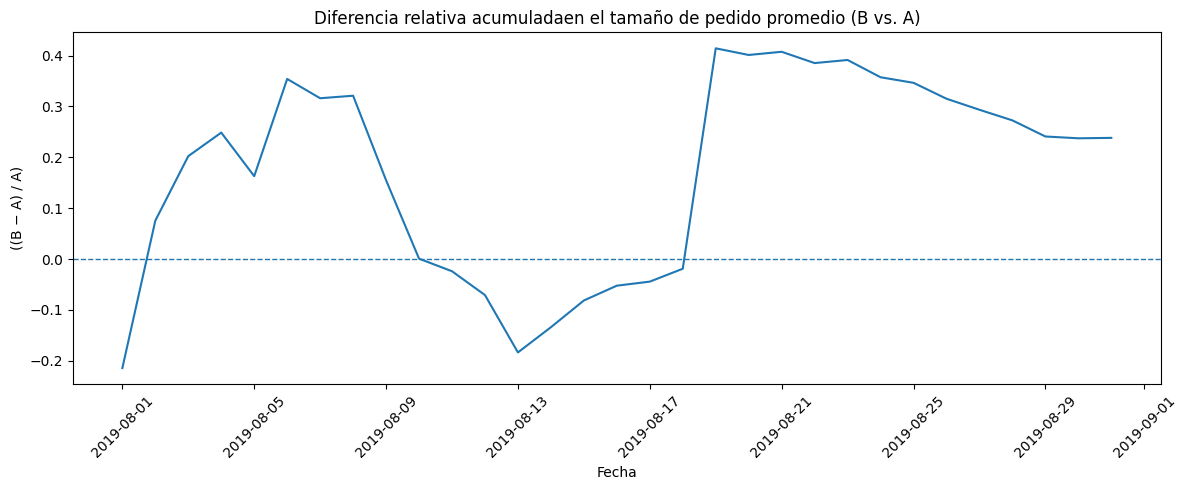

In [46]:
# --- 6. Gráfica -----------------------------------
plt.figure(figsize=(12, 5))
plt.plot(cum_pivot.index, cum_pivot['rel_diff_B_vs_A'])
plt.axhline(0, ls='--', lw=1)               # referencia de “sin diferencia”
plt.title('Diferencia relativa acumuladaen el tamaño de pedido promedio (B vs. A)')
plt.ylabel('((B − A) / A)')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tasa de conversión

* El grupo B termina con un ticket medio acumulado más alto que el grupo A, a pesar de algunas fluctuaciones. Esto puede indicar que alguna intervención o cambio en B tuvo un efecto positivo en el comportamiento de compra, especialmente a partir del 18 de agosto.

In [47]:
# Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día

df_orders['date'] = pd.to_datetime(df_orders['date']).dt.date
df_visits['date'] = pd.to_datetime(df_visits['date']).dt.date

df_combined = pd.merge(df_orders, df_visits, on=['date', 'group'], how='left')

daily_conv = (
    df_combined
    .groupby(['group', 'date'])
    .agg(
        orders=('revenue', 'count'),
        visits=('visits', 'first')  
    )
    .reset_index()
)

daily_conv['conversion_rate'] = daily_conv['orders'] / daily_conv['visits']

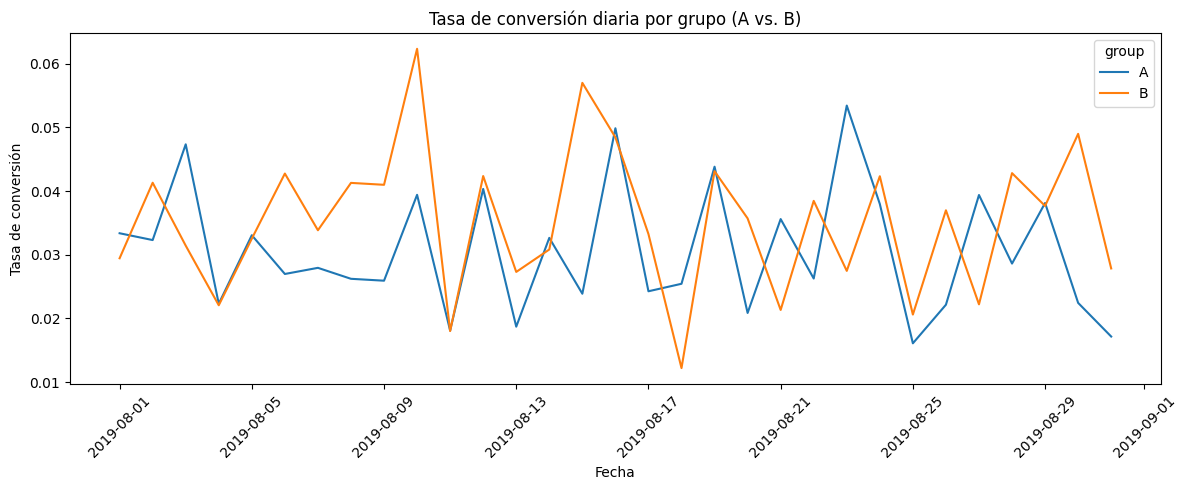

In [48]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_conv, x='date', y='conversion_rate', hue='group')
plt.title('Tasa de conversión diaria por grupo (A vs. B)')
plt.ylabel('Tasa de conversión')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Grupo B suele tener una tasa de conversión diaria más alta que el grupo A durante la mayoría del período observado.

* Hay días en los que las tasas se cruzan, pero en general, B mantiene una ventaja constante.

* La diferencia no es lineal ni constante: hay picos de conversión en ambos grupos

Grupo B convierte mejor: La tasa de conversión más alta sugiere que los usuarios del grupo B están más dispuestos a completar una compra después de visitar el sitio.

### Gráfico de dispersión del número de pedidos por usuario

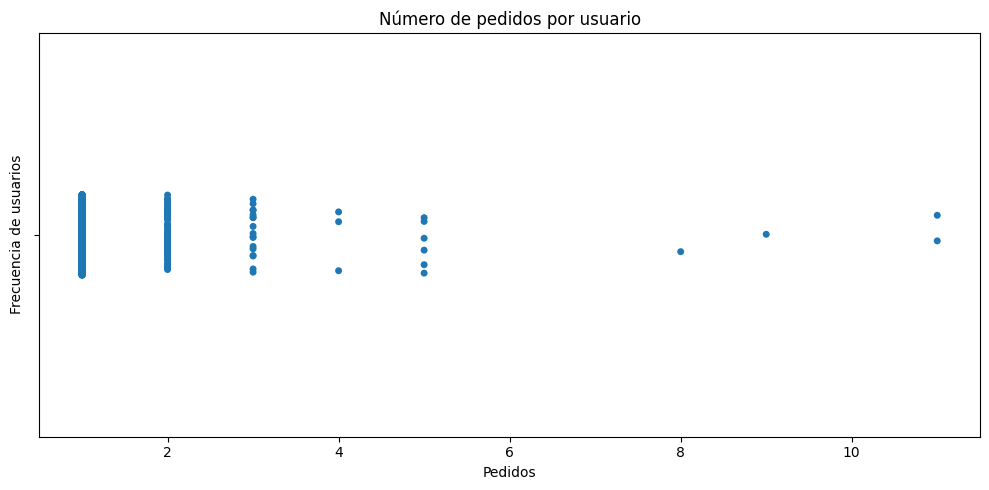

In [49]:
orders_per_user = df_orders.groupby('visitorId')['revenue'].count().reset_index()
orders_per_user.columns = ['visitorId', 'order_count']


plt.figure(figsize=(10, 5))
sns.stripplot(data=orders_per_user, x='order_count', jitter=True)
plt.title('Número de pedidos por usuario')
plt.xlabel('Pedidos')
plt.ylabel('Frecuencia de usuarios')
plt.tight_layout()
plt.show()


* La mayoría de los usuarios solo hacen 1 pedido, y hay una disminución clara en el número de usuarios que hacen más de uno.
* Aquellos que han hecho 3 o más pedidos podrían representar una base valiosa de usuarios fieles.
* Podría haber oportunidades para mejorar la fidelización a través de email marketing, descuentos por recompra o programas de puntos.

###  Percentiles 95 y 99 

In [50]:
orders_per_user = df_orders.groupby('visitorId')['revenue'].count().reset_index()
orders_per_user.columns = ['visitorId', 'order_count']


print(np.percentile(orders_per_user['order_count'], [90, 95, 99]))

[1. 2. 4.]


No más del 5% de los usuarios realizaron más de dos pedidos y no más del 1% de los usuarios realizaron más de cuatro.

### Gráfico de dispersión de los precios de los pedidos

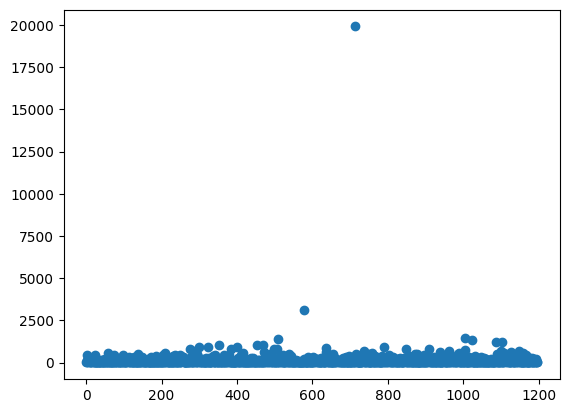

In [51]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))

plt.scatter(x_values,df_orders['revenue'])

No hay muchos pedidos que cuesten más de 2.500. Hay valores atípicos de más o menos 3.000 y 20.000.

El pedido de $20.000 definitivamente parece bastante anómalo.

### Percentiles 95 y 99 de los precios de los pedidos

In [52]:
print("Percentiles 95/99:", np.percentile(df_orders['revenue'], [95, 99]))

Percentiles 95/99: [435.54  900.904]


No más del 5% de los usuarios realizaron pedidos que costaron más de $ 435.54. No más del 1% realizaron pedidos más caros que $ 900.904.

### Significancia estadística de la diferencia en la conversión

In [53]:
ordersByUsersA = df_combined[df_combined['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = df_combined[df_combined['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_combined[df_combined['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_combined[df_combined['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.822
-0.000


p-value = 0.441
* No hay diferencia estadísticamente significativa entre los grupos A y B en términos de conversión:
* El p-value (0.822) es mucho mayor que el umbral común de significancia (0.05).
* El grupo B no convierte mejor ni peor que el grupo A.

### Significancia estadística de la diferencia en el tamaño promedio de pedido

In [54]:
print('{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


* No hay evidencia estadística suficiente para afirmar que el tamaño promedio de pedido es diferente entre los grupos.
* El p-value = 0.692 está muy por encima del umbral del 0.05, por lo que no se puede rechazar la hipótesis nula.

### Significancia estadística utilizando los datos filtrados

In [55]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 20000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

227    2038680547
326    2378935119
278    2458001652
499    4256040402
Name: visitorId, dtype: int64
(4,)


En total, tenemos 4 usuarios anómalos.

In [56]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [57]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.149


* El p-valor de 0.016 está por debajo del umbral común de 0.05, lo que indica que la diferencia en la conversión entre los grupos A y B es significativa.

* Esto contrasta con el análisis anterior (sin filtrar), donde el p-valor era alto (0.822) y no había diferencia relevante.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [58]:
# Muestra el valor p calculado con la prueba U de Mann-Whitney
print("{0:.3f}".format(stats.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',  # Selecciona datos en el grupo A
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],  # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo A
    df_orders[np.logical_and(
        df_orders['group']=='B',  # Selecciona datos en el grupo B
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue']  # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo B
)[1]))  # Extrae el valor p de los resultados de la prueba

# Muestra la diferencia relativa en el ingreso medio entre los grupos B y A
print("{0:.3f}".format(
    df_orders[np.logical_and(df_orders['group']=='B',  # Selecciona datos en el grupo B
           np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /  # Calcula el ingreso medio para el grupo B
    df_orders[np.logical_and(df_orders['group']=='A',  # Selecciona datos en el grupo A
           np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))  # Calcula el ingreso medio para el grupo A y muestra la diferencia relativa

0.960
0.235


* El valor p de 0.960 indica que no hay evidencia estadísticamente significativa para rechazar la hipótesis nula, que asume que las distribuciones de los tamaños de pedido (ingresos) en ambos grupos son iguales.
* Aunque el grupo B muestra un ingreso promedio 23.5% mayor que el grupo A, esta diferencia no es estadísticamente significativa, como lo confirma el valor p elevado

<div class="alert alert-block alert-info"> 
    
Conclusion
    
Con base en los resultados se recomienda parar la prueba, ya que no hay diferencia entre los grupos.El valor p tan alto indica que no hay evidencia de una diferencia real entre los grupos.
Basándonos en estos hechos, podemos concluir que la prueba no fue exitosa y debe pararse. No tiene sentido continuarla, ya que la probabilidad de que el segmento B resulte ser mejor que el segmento A es casi inexistente. 
</div>